In [8]:
from google.colab import drive
drive.mount(('/content/drive'))

Mounted at /content/drive


In [9]:
!ls

drive  sample_data


In [10]:
%cd /content/drive/MyDrive/facial_expression/

/content/drive/MyDrive/facial_expression


In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers

## Separating data

In [ ]:
data_org = pd.read_csv("fer2013/fer2013.csv")
data_org.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data_org.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
data_org.groupby(['Usage']).count()

,emotion,pixels
Usage,,
PrivateTest,3589,3589
PublicTest,3589,3589
Training,28709,28709


In [ ]:
for i, data in data_org.groupby('Usage'):
    data.to_csv("{}.csv".format(i))

In [ ]:
test_private = pd.read_csv("PrivateTest.csv")
test_private

,Unnamed: 0,emotion,pixels,Usage
0,32298,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...,PrivateTest
1,32299,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...,PrivateTest
2,32300,6,232 240 241 239 237 235 246 117 24 24 22 13 12...,PrivateTest
3,32301,4,200 197 149 139 156 89 111 58 62 95 113 117 11...,PrivateTest
4,32302,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...,PrivateTest
...,...,...,...,...
3584,35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
3585,35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
3586,35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
3587,35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
test_public = pd.read_csv("PublicTest.csv")
test_public

,Unnamed: 0,emotion,pixels,Usage
0,28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
1,28710,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
2,28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
3,28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
4,28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest
...,...,...,...,...
3584,32293,4,178 176 172 173 173 174 176 173 166 166 206 22...,PublicTest
3585,32294,3,25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...,PublicTest
3586,32295,4,255 255 255 255 255 255 255 255 255 255 255 25...,PublicTest
3587,32296,4,33 25 31 36 36 42 69 103 132 163 175 183 187 1...,PublicTest


In [ ]:
train = pd.read_csv("Training.csv")
train

,Unnamed: 0,emotion,pixels,Usage
0,0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...,...
28704,28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training


## Emotion Distribution

In [ ]:
emotion_label = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

[Text(0, 0, 'Angry'),
 Text(0, 0, 'Disgust'),
 Text(0, 0, 'Fear'),
 Text(0, 0, 'Happy'),
 Text(0, 0, 'Sad'),
 Text(0, 0, 'Surprise'),
 Text(0, 0, 'Neutral')]

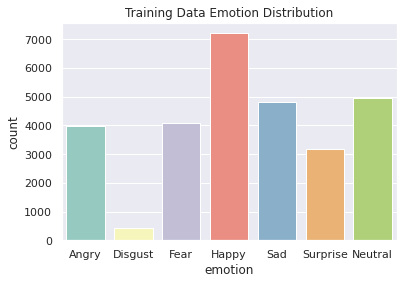

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax1 = sns.countplot(x="emotion", data=train, palette= "Set3")
ax1.set_title("Training Data Emotion Distribution");
ax1.set_xticklabels(emotion_label.values())

[Text(0, 0, 'Angry'),
 Text(0, 0, 'Disgust'),
 Text(0, 0, 'Fear'),
 Text(0, 0, 'Happy'),
 Text(0, 0, 'Sad'),
 Text(0, 0, 'Surprise'),
 Text(0, 0, 'Neutral')]

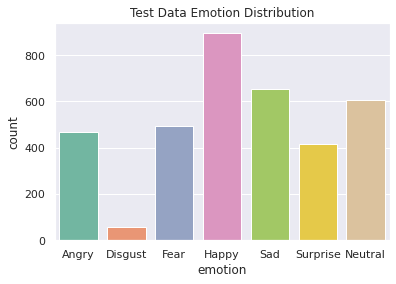

In [ ]:
sns.set_theme(style="darkgrid")
ax2 = sns.countplot(x="emotion", data=test_public, palette="Set2")
ax2.set_title("Test Data Emotion Distribution");
ax2.set_xticklabels(emotion_label.values())

[Text(0, 0, 'Angry'),
 Text(0, 0, 'Disgust'),
 Text(0, 0, 'Fear'),
 Text(0, 0, 'Happy'),
 Text(0, 0, 'Sad'),
 Text(0, 0, 'Surprise'),
 Text(0, 0, 'Neutral')]

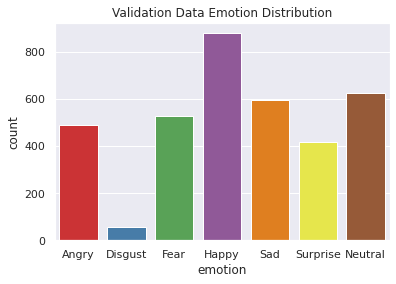

In [ ]:
sns.set_theme(style="darkgrid")
ax3 = sns.countplot(x="emotion", data=test_private, palette="Set1")
ax3.set_title("Validation Data Emotion Distribution");
ax3.set_xticklabels(emotion_label.values())

### Separating Training Data based on Emotions

In [ ]:
emotion_split = train.groupby(['emotion']).count()
emotion_split

,Unnamed: 0,pixels,Usage
emotion,,,
0,3995,3995,3995
1,436,436,436
2,4097,4097,4097
3,7215,7215,7215
4,4830,4830,4830
5,3171,3171,3171
6,4965,4965,4965


In [ ]:
for j, dx in train.groupby('emotion'):
    dx.to_csv("{}.csv".format(j))

In [ ]:
#sample
disgust = pd.read_csv("train/1.csv")
disgust.head()

,Unnamed: 0,Unnamed: 0.1,emotion,pixels,Usage
0,299,299,1,126 126 129 120 110 168 174 172 173 174 170 15...,Training
1,388,388,1,89 55 24 40 43 48 53 55 59 41 33 31 22 32 42 4...,Training
2,416,416,1,204 195 181 131 50 50 57 56 66 98 138 161 173 ...,Training
3,473,473,1,14 11 13 12 41 95 113 112 111 122 132 137 142 ...,Training
4,533,533,1,18 25 49 75 89 97 100 100 101 103 105 107 107 ...,Training


### Separating Testing Data based on Emotions

In [ ]:
for i, data in test_public.groupby('emotion'):
    data.to_csv("{}.csv".format(i))

In [ ]:
#sample
happy = pd.read_csv("test/3.csv")
happy.head()

,Unnamed: 0,Unnamed: 0.1,emotion,pixels,Usage
0,4,28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest
1,5,28714,3,235 233 223 109 34 37 34 31 28 38 56 69 106 13...,PublicTest
2,10,28719,3,180 175 169 161 157 158 157 154 155 157 162 16...,PublicTest
3,19,28728,3,22 9 17 40 41 40 28 19 39 67 84 93 97 104 103 ...,PublicTest
4,30,28739,3,106 121 122 124 139 138 134 134 139 141 153 15...,PublicTest


### Separating Validation data based on emotions

In [ ]:
for i, data in test_private.groupby('emotion'):
    data.to_csv("{}.csv".format(i))

In [ ]:
#sample
neutral = pd.read_csv("validation/6.csv")
neutral.head()

,Unnamed: 0,Unnamed: 0.1,emotion,pixels,Usage
0,2,32300,6,232 240 241 239 237 235 246 117 24 24 22 13 12...,PrivateTest
1,15,32313,6,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,PrivateTest
2,21,32319,6,22 18 17 17 26 35 26 18 22 22 18 19 14 22 24 2...,PrivateTest
3,23,32321,6,77 79 75 74 79 85 85 80 139 214 212 187 190 20...,PrivateTest
4,27,32325,6,186 184 186 185 176 174 177 171 171 176 169 15...,PrivateTest


#Creating Images for available data emotions 

## Converting pixel information to image

In [ ]:
def pixel_to_img(path, data_df):
  tosave_path = path
  data = data_df
  for i in range(len(data)):
    x = np.array(data.pixels[i].split(" ")).reshape(48,48).astype('float')
    #pyplot.figure()
    #pyplot.imshow(x)
    fname = path.strip('/')
    filename = fname+str(i)+".jpg"
    pyplot.imsave(path+filename, x)

#### Conversion for Train Data

In [ ]:
%cd train/

/content/drive/MyDrive/facial_expression/train


In [ ]:
train_angry = pd.read_csv('0.csv')
pixel_to_img('angry/',train_angry)

In [ ]:
train_disgust = pd.read_csv('1.csv')
pixel_to_img('disgust/',train_disgust)

In [ ]:
train_fear = pd.read_csv('2.csv')
pixel_to_img('fear/',train_fear)

In [ ]:
train_happy = pd.read_csv('3.csv')
pixel_to_img('happy/',train_happy)

In [ ]:
train_sad = pd.read_csv('4.csv')
pixel_to_img('sad/',train_sad)

In [ ]:
train_suprise = pd.read_csv('5.csv')
pixel_to_img('suprise/',train_suprise)

In [ ]:
train_neutral = pd.read_csv('6.csv')
pixel_to_img('neutral/',train_neutral)

#### Conversion for Test Data


In [ ]:
test_angry = pd.read_csv('0.csv')
pixel_to_img('angry/',test_angry)

In [ ]:
test_disgust = pd.read_csv('1.csv')
pixel_to_img('disgust/',test_disgust)

In [ ]:
test_fear = pd.read_csv('2.csv')
pixel_to_img('fear/',test_fear)

In [ ]:
test_happy = pd.read_csv('3.csv')
pixel_to_img('happy/',test_happy)

In [ ]:
test_sad = pd.read_csv('4.csv')
pixel_to_img('sad/',test_sad)

In [ ]:
test_suprise = pd.read_csv('5.csv')
pixel_to_img('suprise/',test_suprise)

In [ ]:
test_neutral = pd.read_csv('6.csv')
pixel_to_img('neutral/',test_neutral)

#### Conversion for Validation data

In [ ]:
v_angry = pd.read_csv('0.csv')
pixel_to_img('angry/',v_angry)

In [ ]:
v_disgust = pd.read_csv('1.csv')
pixel_to_img('disgust/',v_disgust)

In [ ]:
v_fear = pd.read_csv('2.csv')
pixel_to_img('fear/',v_fear)

In [ ]:
v_happy = pd.read_csv('3.csv')
pixel_to_img('happy/',v_happy)

In [ ]:
v_sad = pd.read_csv('4.csv')
pixel_to_img('sad/',v_sad)

In [ ]:
v_suprise = pd.read_csv('5.csv')
pixel_to_img('suprise/',v_suprise)

In [ ]:
v_neutral = pd.read_csv('6.csv')
pixel_to_img('neutral/',v_neutral)

## Converting Images to Gray Scale Images - Batch Conversion

In [ ]:
direc = os.listdir(input_folder)
for i in direc:
    img = Image.open(input_folder+i)
    grayimg = img.convert('L')
    grayimg.save(output_folder+i)

#### Path for Data - GrayScale

In [ ]:
input_folder = './angry/'
output_folder = './angry_BW/'

In [ ]:
input_folder = './disgust/'
output_folder = './disgust_BW/'

In [ ]:
input_folder = './fear/'
output_folder = './fear_BW/'

In [ ]:
input_folder = './happy/'
output_folder = './happy_BW/'

In [ ]:
input_folder = './sad/'
output_folder = './sad_BW/'

In [ ]:
input_folder = './suprise/'
output_folder = './suprise_BW/'

In [ ]:
input_folder = './neutral/'
output_folder = './neutral_BW/'

#**Building a two class classification model**

### Helper function to analyze number of images in each folder

In [13]:
def count_exp(path, name):
    d = {}
    for emotion in os.listdir(path):
        direc = path + emotion
        d[emotion] = len(os.listdir(direc))
    df = pd.DataFrame(d, index=[name])
    return df

In [14]:
train_path = '/content/drive/MyDrive/facial_expression/data/train/'
test_path = '/content/drive/MyDrive/facial_expression/data/test/'

train_img_count = count_exp(train_path, 'train')
test_img_count = count_exp(test_path, 'test')

print(train_img_count)
print(test_img_count)

       angry  surprise
train   3995      3171
      angry_BW  suprise_BW
test       467         415


### Visualizing Images in Train and Test directories

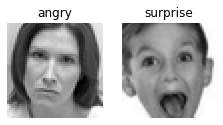

In [15]:
plt.figure(figsize=(14,22))
i = 1
for e in os.listdir(train_path):
    img = load_img((train_path + e +'/'+ os.listdir(train_path + e)[5]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(e)
    plt.axis('off')
    i += 1
plt.show()

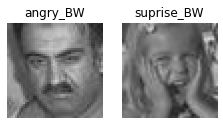

In [16]:
plt.figure(figsize=(14,22))
i = 1
for e in os.listdir(test_path):
    img = load_img((test_path + e +'/'+ os.listdir(test_path + e)[5]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(e)
    plt.axis('off')
    i += 1
plt.show()

In [17]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

train_set = train_data_gen.flow_from_directory(train_path, 
                                                 batch_size=64, 
                                                 target_size=(48,48), 
                                                 shuffle=True, 
                                                 color_mode='grayscale', 
                                                 class_mode='categorical')

Found 7166 images belonging to 2 classes.


In [18]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_set = test_data_gen.flow_from_directory(test_path, 
                                                 batch_size=64, 
                                                 target_size=(48,48), 
                                                 shuffle=True, 
                                                 color_mode='grayscale', 
                                                 class_mode='categorical')

Found 882 images belonging to 2 classes.


In [19]:
train_set.class_indices

{'angry': 0, 'surprise': 1}

In [20]:
test_set.class_indices

{'angry_BW': 0, 'suprise_BW': 1}

In [21]:
def model_cnn(input_size, classes):
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [22]:
row, col = 48, 48
classes = 2
FER_model = model_cnn((row,col,1), classes)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [23]:
hist = FER_model.fit(x=train_set,
                 validation_data=test_set,
                 epochs=20)

Epoch 1/20
112/112 [==============================] - 2273s 20s/step - loss: 1.0829 - accuracy: 0.6499 - val_loss: 2.0973 - val_accuracy: 0.4705
Epoch 2/20
112/112 [==============================] - 13s 116ms/step - loss: 0.5855 - accuracy: 0.7258 - val_loss: 3.3565 - val_accuracy: 0.4705
Epoch 3/20
112/112 [==============================] - 13s 115ms/step - loss: 0.5186 - accuracy: 0.7577 - val_loss: 1.1985 - val_accuracy: 0.4705
Epoch 4/20
112/112 [==============================] - 13s 115ms/step - loss: 0.4959 - accuracy: 0.7728 - val_loss: 0.7015 - val_accuracy: 0.6338
Epoch 5/20
112/112 [==============================] - 13s 116ms/step - loss: 0.4676 - accuracy: 0.7823 - val_loss: 0.5649 - val_accuracy: 0.7608
Epoch 6/20
112/112 [==============================] - 13s 115ms/step - loss: 0.4556 - accuracy: 0.7933 - val_loss: 0.6580 - val_accuracy: 0.7551
Epoch 7/20
112/112 [==============================] - 13s 113ms/step - loss: 0.4282 - accuracy: 0.8052 - val_loss: 0.4293 - val_ac

### Visualizing Model Accuracy

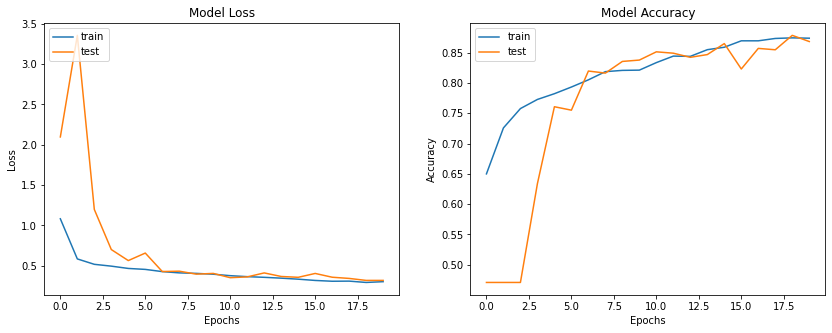

In [24]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
train_loss, train_accu = FER_model.evaluate(train_set)
test_loss, test_accu = FER_model.evaluate(test_set)
print("Train accuracy = {:.2f} , Validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

14/14 [==============================] - 1s 76ms/step - loss: 0.3192 - accuracy: 0.8685
Train accuracy = 88.96 , Validation accuracy = 86.85


In [26]:
FER_model.save_weights('fer_model_best.h5')